In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.stats import norm
from scipy.stats import multivariate_normal

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns


In [2]:
class GaussianMixtureModel:
    '''
     This class implements a Gaussian Mixture Model which has several methods for 
     data generation, likelihood calculation, and visualization of the results.
     
    '''
    def __init__(self, n_dimensions, n_components, means, covs, weights):
        '''
        Initializes the class with the number of dimensions, number of components, 
        means, covariance matrices, and weights for each dimension.
        
        Arguments
        n_dimensions [int]: number of dimensions of dataset
        n_components [int]: number of components in the input data
        means [list]: means for each Gaussian component
        covs [list]: covariance matrices for each Gaussian component
        weights [list]: weights for each Gaussian component
        
        '''
        self.n_dimensions = n_dimensions
        self.n_components = n_components
        self.means = means
        self.covs = covs
        self.weights = weights
    
    
    def generate_data(self, n_samples):
        '''
        Generates new data samples from the Gaussian Mixture Model.
        It takes the number of samples as input and returns the generated samples.

        Arguments
        n_samples [int]: number of samples in the input data

        Returns
        X [numpy array]: generated samples which will be used as input data later

        '''
        X = np.empty((n_samples, self.n_dimensions)) # initialize an empty numpy array with the shape to store generated samples
        for i in range(n_samples): 
            component = np.random.choice(self.n_components, p = self.weights) # randomly choose a component based on weights
            X[i, :] = np.random.multivariate_normal(self.means[component], self.covs[component]) 
        return X # return generated samples 

    
    def calculate_likelihood(self, X):
        '''
        Calculates the likelihood of each sample according to the Gaussian mixture model. 

        Arguments
        X [numpy array]: input array of data
        
        Returns
        likelihoods [numpy array]: likelihood of each sample across all components
        
        '''
        likelihood = np.zeros((X.shape[0], self.n_components)) # initialize the likelihood array with 0 values
        # calculate likelihood of each sample using the Gaussian distribution formula
        for component in range(self.n_components):
            likelihood[:, component] = multivariate_normal.pdf(X, mean = self.means[component], cov = self.covs[component]) * self.weights[component]
        # sum the likelihood of each sample across all components
        likelihoods = likelihood.sum(axis = 1)
        
        return likelihoods # return the sum of the likelihood of each sample
    
    
    def plot_data(self, X):
        '''
        Plots scatter plot for data.
        
        Arguments
        X [numpy array]: input array of data
                
        '''
        plt.rcParams["figure.figsize"] = (8, 6)
        
        n_dimensions = X.shape[1]
        
        # 2D data
        if n_dimensions == 2:
            plt.scatter(X[:, 0], X[:, 1], marker = 'o', s = 6, alpha = 0.5)
            plt.title("Scatter plot")
            plt.show()
        
        # 3D data
        elif n_dimensions == 3:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection = '3d')
            ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker = 'o', s = 6, alpha = 0.5)
            plt.title("Scatter plot")
            plt.show()
            

    def plot_histograms(self, X):
        '''
        Plots histograms for data.
        
        Arguments
        X [numpy array]: input array of data
        
        '''
        plt.rcParams["figure.figsize"] = (8, 6)
        
        fig, ax = plt.subplots()

        sns.distplot(X[:, 0], ax = ax)
        ax.set_title('Histogram')
        plt.show()


    def plot_surface(self, X):
        '''
        Plots surface plot for data.

        Arguments
        X [numpy array]: input array of data

        '''
        n_dimensions = X.shape[1] # get number of dimensions in the input data

        # 2D data
        if n_dimensions == 2:
            fig, ax = plt.subplots()
            hist, xedges, yedges = np.histogram2d(X[:,0], X[:,1], bins = 40, range = [[np.min(X[:,0]), np.max(X[:,0])],[np.min(X[:,1]), np.max(X[:,1])]])
            X_pos, Y_pos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])
            Z_pos = hist
            ax.pcolormesh(X_pos, Y_pos, Z_pos, cmap = 'Blues')
            ax.set_title('Surface plot')
            plt.show()

        # 3D data
        elif n_dimensions == 3:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            hist, xedges, yedges = np.histogram2d(X[:,0], X[:,1], bins = 40, range = [[np.min(X[:,0]), np.max(X[:,0])],[np.min(X[:,1]), np.max(X[:,1])]])
            X_pos, Y_pos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])
            Z_pos = hist
            ax.plot_surface(X_pos, Y_pos, Z_pos, cmap = 'Blues')
            ax.set_title('Surface plot')
            plt.show()




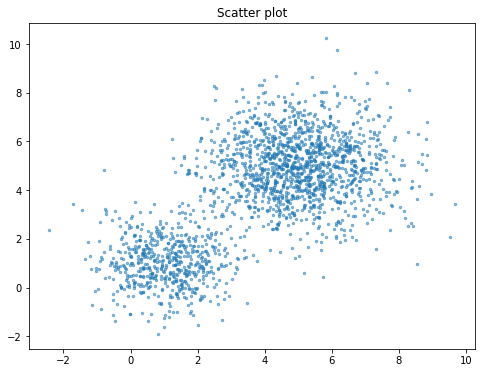

[0.02046731 0.02289339 0.04120042 ... 0.04604638 0.0106786  0.02033933]


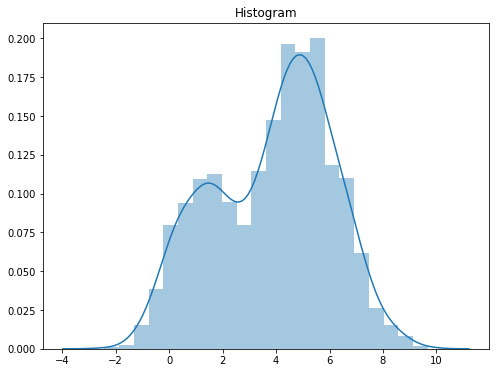

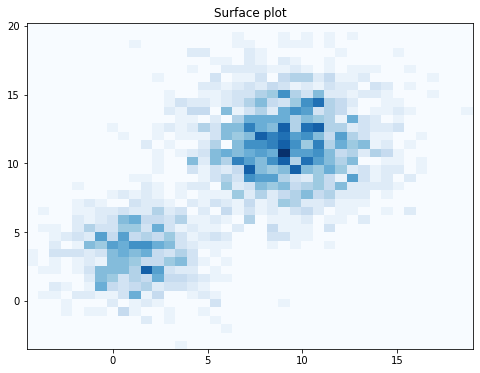

In [3]:
# Define the Gaussian Mixture Model with 2 dimensions and 2 components
dimensions = 2
components = 2

gmm1 = GaussianMixtureModel(n_dimensions = dimensions, 
                            n_components = components, 
                           means = [[1, 1], [5, 5]], 
                           covs = [[[1, 0], [0, 1]], 
                                 [[2, 0], [0, 2]]], 
                           weights = [0.3, 0.7])

# Initialize the Gaussian Mixture Model class with n samples
n_samples = 2000
X1 = gmm1.generate_data(n_samples)

# Plot the data X
gmm1.plot_data(X1)

# Calculate the likelihood of the data X
likelihood1 = gmm1.calculate_likelihood(X1)
print(likelihood1)

# Plot the histograms of the data X
gmm1.plot_histograms(X1)

# Plot the surface of the data X
gmm1.plot_surface(X1)

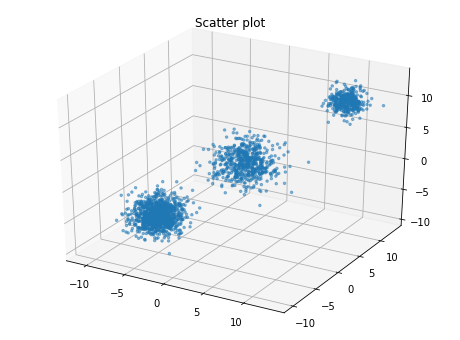

[0.00030872 0.00906039 0.00138899 ... 0.00113079 0.00713616 0.00325292]


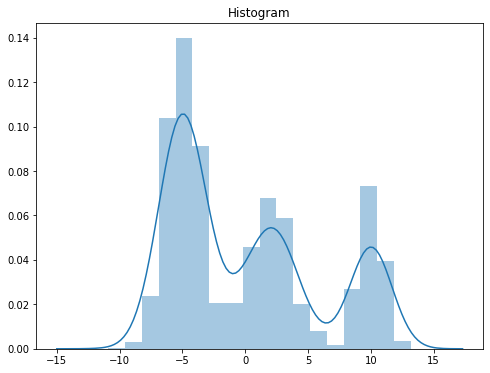

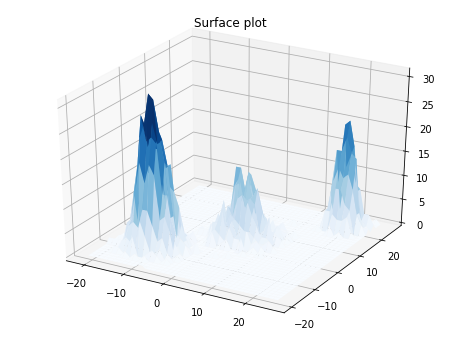

In [4]:
# Define the Gaussian Mixture Model with 3 dimensions and 3 components
dimensions = 3
components = 3

gmm2 = GaussianMixtureModel(n_dimensions = dimensions, 
                           n_components = dimensions, 
                           means = [[10, 10, 10], [-5, -5, -5], [2, 2, 2]], 
                           covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], 
                                   [[2, 0, 0], [0, 2, 0], [0, 0, 2]],
                                   [[3, 0, 0], [0, 3, 0], [0, 0, 3]]], 
                           weights=[0.2, 0.5, 0.3])

# Initialize the Gaussian Mixture Model class with n samples
n_samples = 2000
X2 = gmm2.generate_data(n_samples)

# Plot the data X
gmm2.plot_data(X2)

# Calculate the likelihood of the data X
likelihood2 = gmm2.calculate_likelihood(X2)
print(likelihood2)

# Plot the histograms of the data X
gmm2.plot_histograms(X2)

# Plot the surface of the data X
gmm2.plot_surface(X2)

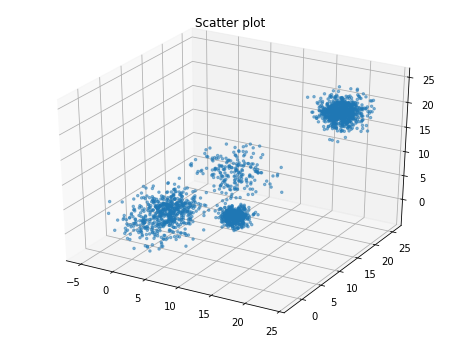

[3.43083111e-04 5.55263353e-03 3.94095737e-03 ... 6.92186708e-04
 2.68507552e-04 6.03811915e-05]


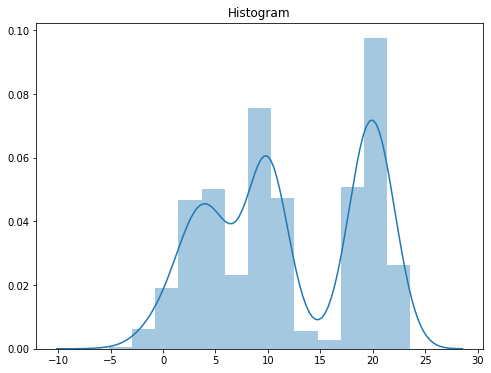

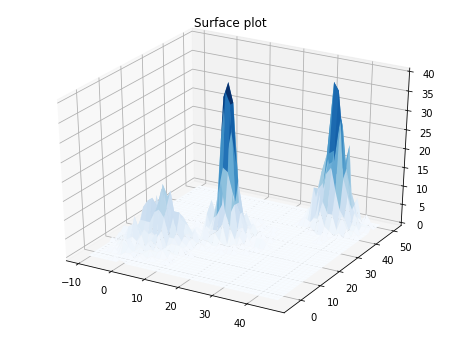

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian Mixture Model with 3 dimensions and 5 components
dimensions = 3
components = 5

gmm3 = GaussianMixtureModel(n_dimensions = dimensions, 
                           n_components = components, 
                            means = [[10, 10, 1], [2, 2, 2], [20, 20, 20], [4, 4, 4], [10, 10, 10]],
                            covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], 
                                    [[5, 0, 0], [0, 5, 0], [0, 0, 5]],
                                    [[2, 0, 0], [0, 2, 0], [0, 0, 2]],
                                    [[3, 0, 0], [0, 3, 0], [0, 0, 3]],
                                    [[5, 0, 0], [0, 5, 0], [0, 0, 5]]],
                            weights = [0.2, 0.1, 0.4, 0.2, 0.1])
                            
# Initialize the Gaussian Mixture Model class with n samples
n_samples = 2000
X3 = gmm3.generate_data(n_samples)

# Plot the data X
gmm3.plot_data(X3)

# Calculate the likelihood of the data X
likelihood3 = gmm3.calculate_likelihood(X3)
print(likelihood3)

# Plot the histograms of the data X
gmm3.plot_histograms(X3)

# Plot the surface of the data X
gmm3.plot_surface(X3)

[1.47594337e-09 4.25414656e-09 3.33715023e-10 ... 4.53175510e-09
 2.70878824e-10 2.58279662e-08]


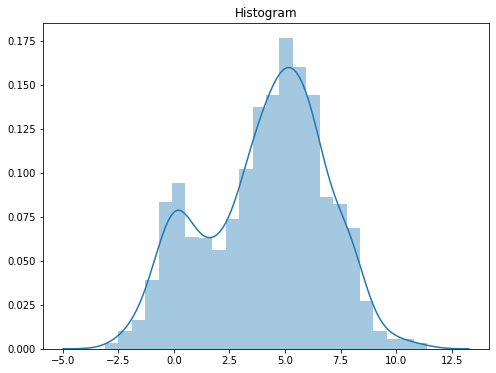

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian Mixture Model with 10 dimensions and 2 components
dimensions = 10
components = 2


gmm4 = GaussianMixtureModel(n_dimensions = dimensions, 
                           n_components = components, 
                            means = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]],
                            covs = [[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                    [[4, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 4, 0, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 4, 0, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 4, 0, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 4, 0, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 4, 0, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 4, 0, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 4, 0, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 0, 4, 0], 
                                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 4]]],
                            weights = [0.2, 0.8])
                            
# Initialize the Gaussian Mixture Model class with n samples
n_samples = 2000
X4 = gmm4.generate_data(n_samples)

# Plot the data X
gmm4.plot_data(X4)

# Calculate the likelihood of the data X
likelihood4 = gmm4.calculate_likelihood(X4)
print(likelihood4)

# Plot the histograms of the data X
gmm4.plot_histograms(X4)
